https://anaconda.cloud/tutorials/8d29a356-46f8-4c5f-9fe8-3b3458b5a252?source=individual_tutorial
https://www.anaconda.com/products/individual/installation-success?source=win_installer

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
#df.describe()

In [3]:
#df.iloc[0, 5:10]

In [4]:
#df['Age'].mean()

In [5]:
df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [16]:
v = pd.DataFrame(df, columns = ['Name', 'Value', 'Wage'])

In [17]:
f = lambda x: float(x.strip('€M'))*1000000 if x[-1] == 'M' else float(x.strip('€K'))*1000

In [18]:
v['Difference'] = v['Value'].apply(f) - v['Wage'].apply(f)

In [20]:
#d = v.sort_values('Difference', ascending = False)

In [21]:
d['Wage'] = d['Wage'].apply(f)
d['Value'] = d['Value'].apply(f)
d

,Name,Value,Wage,Difference
2,Neymar Jr,118500000.0,290000.0,118210000.0
0,L. Messi,110500000.0,565000.0,109935000.0
4,K. De Bruyne,102000000.0,355000.0,101645000.0
5,E. Hazard,93000000.0,340000.0,92660000.0
15,P. Dybala,89000000.0,205000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,0.0,1000.0,-1000.0
12192,H. Sulaimani,0.0,3000.0,-3000.0
3550,S. Nakamura,0.0,4000.0,-4000.0
4228,B. Nivet,0.0,5000.0,-5000.0


<AxesSubplot:xlabel='Wage', ylabel='Value'>

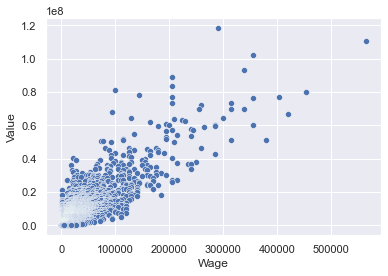

In [22]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y = 'Value', data = d)
graph

In [23]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips = [('index', '$index'), ('(Wage, Value)', '(@Wage, @Value)'), ('Name', '@Name')])


p = figure(title = 'Soccer 2019', x_axis_label = 'Wage', y_axis_label = 'Value', plot_width = 700, plot_height = 700, tools =[TOOLTIPS])
p.circle('Wage', 'Value', size = 10, source = d)
show(p)